In [1]:
import pandas as pd
import wbgapi as wb

import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import plotly.express as px

from matplotlib import cm
#import scipy.stats as st
#from scipy.stats import mstats
#import statsmodels 
#import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
import plotly.offline as py #이거 수업시간 사용 안함. 
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go #이거는 수업시간에 사용함 
import plotly.tools as tls #이것도 사용 안함. 


C:\Users\User\anaconda\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\User\anaconda\lib\site-packages\numpy\.libs\libopenblas.QVLO2T66WEPI7JZ63PS3HMOHFEY472BC.gfortran-win_amd64.dll
C:\Users\User\anaconda\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
#전처리 위한 함수 생성 

def change_col(cols):
    cols = cols.str.strip().str.lower().str.replace(" ", "_").str.replace('(', '').str.replace(')', '')
    return cols

In [3]:
co2_meta_data=pd.read_csv('Metadata_Country_API_EN.ATM.CO2E.KT_DS2_en_csv_v2_3159085-co2emissions(kt).csv')
co2_meta_data.head(5)

,Country Code,Region,IncomeGroup,SpecialNotes,TableName,Unnamed: 5
0,ABW,Latin America & Caribbean,High income,NaN,Aruba,NaN
1,AFE,NaN,NaN,"26 countries, stretching from the Red Sea in t...",Africa Eastern and Southern,NaN
2,AFG,South Asia,Low income,Fiscal year end: March 20; reporting period fo...,Afghanistan,NaN
3,AFW,NaN,NaN,"22 countries, stretching from the westernmost ...",Africa Western and Central,NaN
4,AGO,Sub-Saharan Africa,Lower middle income,NaN,Angola,NaN


In [4]:
co2_meta_data.shape

(265, 6)

In [5]:
co2_value_data=pd.read_csv('API_EN.ATM.CO2E.KT_DS2_en_csv_v2_3159085-co2emissions(kt).csv')
co2_value_data.head(5)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,CO2 emissions (kt),EN.ATM.CO2E.KT,11092.6750,11576.7190,12713.4890,12178.1070,11840.7430,10623.2990,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,CO2 emissions (kt),EN.ATM.CO2E.KT,118545.9013,123758.9033,128093.8978,132810.3325,144345.3524,155803.7801,...,535604.3575,559333.8573,580510.925,601860.164,586385.004,592299.594,601323.3947,600351.1333,NaN,NaN
2,Afghanistan,AFG,CO2 emissions (kt),EN.ATM.CO2E.KT,414.3710,491.3780,689.3960,707.7310,839.7430,1008.4250,...,12260.0000,10450.0000,8510.000,7810.000,7990.000,7390.000,7380.0000,7440.0000,NaN,NaN
3,Africa Western and Central,AFW,CO2 emissions (kt),EN.ATM.CO2E.KT,8760.4630,9376.5190,9710.2160,11540.0490,13985.9380,19827.4690,...,179070.0000,181740.0000,191990.000,198440.000,193060.000,195120.000,201900.0000,224380.0000,NaN,NaN
4,Angola,AGO,CO2 emissions (kt),EN.ATM.CO2E.KT,550.0500,454.7080,1180.7740,1151.4380,1224.7780,1188.1080,...,29460.0000,30250.0000,32820.000,34630.000,35160.000,35410.000,30840.0000,27340.0000,NaN,NaN


In [6]:
co2_meta_data.drop(columns=['SpecialNotes','TableName','Unnamed: 5'],axis=1,inplace=True)

In [7]:
co2_value_data.drop(columns=['Indicator Name','Indicator Code'],axis=1,inplace=True)

In [8]:
print(co2_meta_data.shape)
print(co2_value_data.shape)

(265, 3)
(266, 63)


In [9]:
co2_meta_data.columns = change_col(co2_meta_data.columns)
co2_value_data.columns = change_col(co2_value_data.columns)

In [10]:
f_co2_value_data=co2_value_data.fillna(method='bfill',axis=0)
#final_co2_value_data=f_co2_value_data.fillna(method='bfill',axis=0,inplace=True)

In [11]:
f_co2_value_data.head(5)

,country_name,country_code,1960,1961,1962,1963,1964,1965,1966,1967,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,11092.6750,11576.7190,12713.4890,12178.1070,11840.7430,10623.2990,9933.9030,12236.7790,...,535604.3575,559333.8573,580510.925,601860.164,586385.004,592299.594,601323.3947,600351.1333,NaN,NaN
1,Africa Eastern and Southern,AFE,118545.9013,123758.9033,128093.8978,132810.3325,144345.3524,155803.7801,157932.2573,165066.0405,...,535604.3575,559333.8573,580510.925,601860.164,586385.004,592299.594,601323.3947,600351.1333,NaN,NaN
2,Afghanistan,AFG,414.3710,491.3780,689.3960,707.7310,839.7430,1008.4250,1092.7660,1283.4500,...,12260.0000,10450.0000,8510.000,7810.000,7990.000,7390.000,7380.0000,7440.0000,NaN,NaN
3,Africa Western and Central,AFW,8760.4630,9376.5190,9710.2160,11540.0490,13985.9380,19827.4690,21246.5980,21239.2640,...,179070.0000,181740.0000,191990.000,198440.000,193060.000,195120.000,201900.0000,224380.0000,NaN,NaN
4,Angola,AGO,550.0500,454.7080,1180.7740,1151.4380,1224.7780,1188.1080,1554.8080,993.7570,...,29460.0000,30250.0000,32820.000,34630.000,35160.000,35410.000,30840.0000,27340.0000,NaN,NaN


In [12]:
final_co2_value_data=f_co2_value_data.fillna(method='ffill',axis=0)

In [13]:
final_co2_value_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 63 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country_name  266 non-null    object 
 1   country_code  266 non-null    object 
 2   1960          266 non-null    float64
 3   1961          266 non-null    float64
 4   1962          266 non-null    float64
 5   1963          266 non-null    float64
 6   1964          266 non-null    float64
 7   1965          266 non-null    float64
 8   1966          266 non-null    float64
 9   1967          266 non-null    float64
 10  1968          266 non-null    float64
 11  1969          266 non-null    float64
 12  1970          266 non-null    float64
 13  1971          266 non-null    float64
 14  1972          266 non-null    float64
 15  1973          266 non-null    float64
 16  1974          266 non-null    float64
 17  1975          266 non-null    float64
 18  1976          266 non-null    

In [14]:
final_co2_value_data.drop(['2019','2020'],axis=1,inplace=True)

In [15]:
final_co2_value_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 61 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country_name  266 non-null    object 
 1   country_code  266 non-null    object 
 2   1960          266 non-null    float64
 3   1961          266 non-null    float64
 4   1962          266 non-null    float64
 5   1963          266 non-null    float64
 6   1964          266 non-null    float64
 7   1965          266 non-null    float64
 8   1966          266 non-null    float64
 9   1967          266 non-null    float64
 10  1968          266 non-null    float64
 11  1969          266 non-null    float64
 12  1970          266 non-null    float64
 13  1971          266 non-null    float64
 14  1972          266 non-null    float64
 15  1973          266 non-null    float64
 16  1974          266 non-null    float64
 17  1975          266 non-null    float64
 18  1976          266 non-null    

In [16]:
final_co2_value_data[~final_co2_value_data.country_code.isin(co2_meta_data.country_code)]

,country_name,country_code,1960,1961,1962,1963,1964,1965,1966,1967,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
110,Not classified,INX,11180.683,12365.124,13120.526,13461.557,14231.627,13732.915,15111.707,16413.492,...,41020.0,40630.0,36360.0,37100.0,35720.0,35550.0,36990.0,38710.0,37530.0,37110.0


In [17]:
index_drop_co2=final_co2_value_data[~final_co2_value_data.country_code.isin(co2_meta_data.country_code)].index
print(index_drop_co2)

Int64Index([110], dtype='int64')


In [18]:
final_co2_value_data.drop(index_drop_co2,inplace=True)

In [19]:
co2_mergedData = pd.merge(co2_meta_data, final_co2_value_data, on=["country_code"], how="inner")
co2_mergedData

,country_code,region,incomegroup,country_name,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,ABW,Latin America & Caribbean,High income,Aruba,11092.6750,11576.7190,12713.4890,12178.1070,11840.7430,10623.2990,...,515682.5438,543808.6518,535604.3575,559333.8573,580510.925,601860.164,586385.004,592299.594,601323.3947,600351.1333
1,AFE,NaN,NaN,Africa Eastern and Southern,118545.9013,123758.9033,128093.8978,132810.3325,144345.3524,155803.7801,...,515682.5438,543808.6518,535604.3575,559333.8573,580510.925,601860.164,586385.004,592299.594,601323.3947,600351.1333
2,AFG,South Asia,Low income,Afghanistan,414.3710,491.3780,689.3960,707.7310,839.7430,1008.4250,...,6000.0000,8670.0000,12260.0000,10450.0000,8510.000,7810.000,7990.000,7390.000,7380.0000,7440.0000
3,AFW,NaN,NaN,Africa Western and Central,8760.4630,9376.5190,9710.2160,11540.0490,13985.9380,19827.4690,...,145550.0000,165750.0000,179070.0000,181740.0000,191990.000,198440.000,193060.000,195120.000,201900.0000,224380.0000
4,AGO,Sub-Saharan Africa,Lower middle income,Angola,550.0500,454.7080,1180.7740,1151.4380,1224.7780,1188.1080,...,27150.0000,28530.0000,29460.0000,30250.0000,32820.000,34630.000,35160.000,35410.000,30840.0000,27340.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260,XKX,Europe & Central Asia,Upper middle income,Kosovo,58.6720,73.3400,69.6730,80.6740,99.0090,102.6760,...,25650.0000,23990.0000,20690.0000,19680.0000,26350.000,26710.000,14210.000,10880.000,10060.0000,9310.0000
261,YEM,Middle East & North Africa,Low income,"Yemen, Rep.",58.6720,73.3400,69.6730,80.6740,99.0090,102.6760,...,25650.0000,23990.0000,20690.0000,19680.0000,26350.000,26710.000,14210.000,10880.000,10060.0000,9310.0000
262,ZAF,Sub-Saharan Africa,Upper middle income,South Africa,97934.5690,102213.9580,105767.2810,109826.6500,119657.8770,128260.6590,...,404020.0000,425110.0000,409120.0000,426710.0000,436870.000,447980.000,424880.000,425180.000,435140.0000,433250.0000
263,ZMB,Sub-Saharan Africa,Lower middle income,Zambia,97934.5690,102213.9580,105767.2810,109826.6500,3278.2980,3916.3560,...,2470.0000,2640.0000,3060.0000,4020.0000,4240.000,4800.000,5070.000,5590.000,6990.0000,7740.0000


In [20]:
co2_mergedData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 265 entries, 0 to 264
Data columns (total 63 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country_code  265 non-null    object 
 1   region        217 non-null    object 
 2   incomegroup   216 non-null    object 
 3   country_name  265 non-null    object 
 4   1960          265 non-null    float64
 5   1961          265 non-null    float64
 6   1962          265 non-null    float64
 7   1963          265 non-null    float64
 8   1964          265 non-null    float64
 9   1965          265 non-null    float64
 10  1966          265 non-null    float64
 11  1967          265 non-null    float64
 12  1968          265 non-null    float64
 13  1969          265 non-null    float64
 14  1970          265 non-null    float64
 15  1971          265 non-null    float64
 16  1972          265 non-null    float64
 17  1973          265 non-null    float64
 18  1974          265 non-null    

In [21]:
co2_mergedData.head()

,country_code,region,incomegroup,country_name,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,ABW,Latin America & Caribbean,High income,Aruba,11092.6750,11576.7190,12713.4890,12178.1070,11840.7430,10623.2990,...,515682.5438,543808.6518,535604.3575,559333.8573,580510.925,601860.164,586385.004,592299.594,601323.3947,600351.1333
1,AFE,NaN,NaN,Africa Eastern and Southern,118545.9013,123758.9033,128093.8978,132810.3325,144345.3524,155803.7801,...,515682.5438,543808.6518,535604.3575,559333.8573,580510.925,601860.164,586385.004,592299.594,601323.3947,600351.1333
2,AFG,South Asia,Low income,Afghanistan,414.3710,491.3780,689.3960,707.7310,839.7430,1008.4250,...,6000.0000,8670.0000,12260.0000,10450.0000,8510.000,7810.000,7990.000,7390.000,7380.0000,7440.0000
3,AFW,NaN,NaN,Africa Western and Central,8760.4630,9376.5190,9710.2160,11540.0490,13985.9380,19827.4690,...,145550.0000,165750.0000,179070.0000,181740.0000,191990.000,198440.000,193060.000,195120.000,201900.0000,224380.0000
4,AGO,Sub-Saharan Africa,Lower middle income,Angola,550.0500,454.7080,1180.7740,1151.4380,1224.7780,1188.1080,...,27150.0000,28530.0000,29460.0000,30250.0000,32820.000,34630.000,35160.000,35410.000,30840.0000,27340.0000


In [22]:
co2_mergedData.columns

Index(['country_code', 'region', 'incomegroup', 'country_name', '1960', '1961',
       '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970',
       '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979',
       '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988',
       '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997',
       '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006',
       '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017', '2018'],
      dtype='object')

In [23]:
year_data_co2=co2_mergedData.iloc[:,4:]
year_data_co2

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,11092.6750,11576.7190,12713.4890,12178.1070,11840.7430,10623.2990,9933.9030,12236.7790,11378.7010,14891.6870,...,515682.5438,543808.6518,535604.3575,559333.8573,580510.925,601860.164,586385.004,592299.594,601323.3947,600351.1333
1,118545.9013,123758.9033,128093.8978,132810.3325,144345.3524,155803.7801,157932.2573,165066.0405,174004.8927,182939.9843,...,515682.5438,543808.6518,535604.3575,559333.8573,580510.925,601860.164,586385.004,592299.594,601323.3947,600351.1333
2,414.3710,491.3780,689.3960,707.7310,839.7430,1008.4250,1092.7660,1283.4500,1224.7780,942.4190,...,6000.0000,8670.0000,12260.0000,10450.0000,8510.000,7810.000,7990.000,7390.000,7380.0000,7440.0000
3,8760.4630,9376.5190,9710.2160,11540.0490,13985.9380,19827.4690,21246.5980,21239.2640,16527.1690,23743.8250,...,145550.0000,165750.0000,179070.0000,181740.0000,191990.000,198440.000,193060.000,195120.000,201900.0000,224380.0000
4,550.0500,454.7080,1180.7740,1151.4380,1224.7780,1188.1080,1554.8080,993.7570,1672.1520,2786.9200,...,27150.0000,28530.0000,29460.0000,30250.0000,32820.000,34630.000,35160.000,35410.000,30840.0000,27340.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260,58.6720,73.3400,69.6730,80.6740,99.0090,102.6760,99.0090,102.6760,128.3450,135.6790,...,25650.0000,23990.0000,20690.0000,19680.0000,26350.000,26710.000,14210.000,10880.000,10060.0000,9310.0000
261,58.6720,73.3400,69.6730,80.6740,99.0090,102.6760,99.0090,102.6760,128.3450,135.6790,...,25650.0000,23990.0000,20690.0000,19680.0000,26350.000,26710.000,14210.000,10880.000,10060.0000,9310.0000
262,97934.5690,102213.9580,105767.2810,109826.6500,119657.8770,128260.6590,128356.0010,133885.8370,138084.5520,143280.6910,...,404020.0000,425110.0000,409120.0000,426710.0000,436870.000,447980.000,424880.000,425180.000,435140.0000,433250.0000
263,97934.5690,102213.9580,105767.2810,109826.6500,3278.2980,3916.3560,3501.9850,4792.7690,4572.7490,4275.7220,...,2470.0000,2640.0000,3060.0000,4020.0000,4240.000,4800.000,5070.000,5590.000,6990.0000,7740.0000


In [24]:
#for column in year_data_co2.columns:
#    print(column)

In [25]:
cols=['1960','1961','1962','1963','1964','1965','1966','1967','1968','1969','1970',
     '1971','1972','1973','1974','1975','1976','1977','1978','1979','1980','1981','1982',
     '1983','1984','1985','1986','1987','1988','1989','1990','1991','1992','1993','1994','1995',
     '1996','1997','1998','1999','2000','2001','2002','2003','2004','2005','2006','2007','2008',
     '2009','2010','2011','2012','2013','2014','2015','2016','2017','2018']

In [26]:
zero_list=[]
for col in cols:
    idx=year_data_co2[year_data_co2[col]<0].index
    
    if (len(idx))>0:
        zero_list.append(idx)

In [27]:
zero_list[0][0]

206

In [28]:
co2_mergedData.drop(zero_list[0],inplace=True)

In [29]:
co2_mergedData.shape

(264, 63)

In [30]:
country_list=['Afghanistan','Angola','Albania','Argentina','Armenia','Australia'
,'Austria','Azerbaijan','Burundi','Belgium','Benin','Burkina Faso','Bangladesh','Bulgaria'
,'Bahrain','Bosnia and Herzegovina','Belarus','Belize','Bolivia','Brazil','Barbados','Brunei Darussalam'
,'Bhutan','Botswana','Central African Republic','Canada','Switzerland','Chile','China','Cameroon'
,'Congo','Colombia','Comoros','Cabo Verde','Costa Rica','Cuba','Cyprus','Czech Republic','Germany'
,'Denmark','Dominican Republic','Algeria','Ecuador','Egypt','Spain','Estonia','Ethiopia','Finland','Fiji'
,'France','Gabon','United Kingdom','Georgia','Ghana','Guinea','Greece','Guatemala','Guyana','Hong Kong'
,'Honduras','Croatia','Haiti','Hungary','Indonesia','India','Ireland','Iran','Iraq','Iceland','Israel'
,'Italy','Jamaica','Jordan','Japan','Kazakhstan','Kenya','Cambodia','Korea, Rep.','Kuwait','Lebanon','Liberia'
,'Libya','Sri Lanka','Lesotho','Lithuania','Luxembourg','Latvia','Macao','Morocco','Moldova','Madagascar'
,'Maldives','Mexico','Macedonia','Mali','Malta','Myanmar','Montenegro','Mongolia','Mozambique','Mauritania'
,'Mauritius','Malawi','Malaysia','Namibia','Niger','Nigeria','Nicaragua','Netherlands'
,'Norway','Nepal','New Zealand','Oman','Pakistan','Panama','Peru','Philippines','Papua New Guinea'
,'Poland','Puerto Rico','Portugal','Paraguay','Qatar','Romania','Russian Federation','Rwanda','Saudi Arabia'
,'Sudan','Senegal','Singapore','Solomon Islands','Sierra Leone','El Salvador','Somalia','Serbia','Slovenia'
,'Sweden','Swaziland','Syrian Arab Republic','Chad','Togo','Thailand','Tajikistan','Turkmenistan','Timor-Leste'
,'Trinidad and Tobago','Tunisia','Turkey','Tanzania','Uganda','Ukraine','Uruguay','United States','Uzbekistan'
,'Vietnam','Yemen, Rep.','Congo, Dem. Rep.','Zambia','Zimbabwe'   
]

In [31]:
co2_mergedData=co2_mergedData[co2_mergedData['country_name'].isin(country_list)]
co2_mergedData.shape

(151, 63)

In [32]:
co2_mergedData.head()

,country_code,region,incomegroup,country_name,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
2,AFG,South Asia,Low income,Afghanistan,414.371,491.378,689.396,707.731,839.743,1008.425,...,6000.0,8670.0,12260.0,10450.0,8510.0,7810.0,7990.0,7390.0,7380.0,7440.0
4,AGO,Sub-Saharan Africa,Lower middle income,Angola,550.050,454.708,1180.774,1151.438,1224.778,1188.108,...,27150.0,28530.0,29460.0,30250.0,32820.0,34630.0,35160.0,35410.0,30840.0,27340.0
5,ALB,Europe & Central Asia,Upper middle income,Albania,2024.184,2280.874,2464.224,2082.856,2016.850,2174.531,...,4320.0,4580.0,5040.0,4580.0,4790.0,5220.0,5070.0,4930.0,5600.0,5560.0
9,ARG,Latin America & Caribbean,Upper middle income,Argentina,48815.104,51180.319,53695.881,50083.886,55727.399,58866.351,...,157440.0,168140.0,177260.0,178530.0,184000.0,179910.0,186090.0,184280.0,180120.0,177410.0
10,ARM,Europe & Central Asia,Upper middle income,Armenia,36.670,47.671,102.676,84.341,91.675,150.347,...,4510.0,4340.0,4940.0,5720.0,5500.0,5480.0,5340.0,5070.0,5320.0,5550.0


In [33]:
co2_merged_clean= pd.melt(co2_mergedData,id_vars = ["country_name","country_code","region","incomegroup"], 
var_name = "year")

In [34]:
co2_merged_clean

,country_name,country_code,region,incomegroup,year,value
0,Afghanistan,AFG,South Asia,Low income,1960,414.371
1,Angola,AGO,Sub-Saharan Africa,Lower middle income,1960,550.050
2,Albania,ALB,Europe & Central Asia,Upper middle income,1960,2024.184
3,Argentina,ARG,Latin America & Caribbean,Upper middle income,1960,48815.104
4,Armenia,ARM,Europe & Central Asia,Upper middle income,1960,36.670
...,...,...,...,...,...,...
8904,Uzbekistan,UZB,Europe & Central Asia,Lower middle income,2018,112090.000
8905,Vietnam,VNM,East Asia & Pacific,Lower middle income,2018,257860.000
8906,"Yemen, Rep.",YEM,Middle East & North Africa,Low income,2018,9310.000
8907,Zambia,ZMB,Sub-Saharan Africa,Lower middle income,2018,7740.000


In [35]:
co2_1960=co2_merged_clean[co2_merged_clean['year']=='1960']
co2_1960

,country_name,country_code,region,incomegroup,year,value
0,Afghanistan,AFG,South Asia,Low income,1960,414.371
1,Angola,AGO,Sub-Saharan Africa,Lower middle income,1960,550.050
2,Albania,ALB,Europe & Central Asia,Upper middle income,1960,2024.184
3,Argentina,ARG,Latin America & Caribbean,Upper middle income,1960,48815.104
4,Armenia,ARM,Europe & Central Asia,Upper middle income,1960,36.670
...,...,...,...,...,...,...
146,Uzbekistan,UZB,Europe & Central Asia,Lower middle income,1960,11.001
147,Vietnam,VNM,East Asia & Pacific,Lower middle income,1960,5944.207
148,"Yemen, Rep.",YEM,Middle East & North Africa,Low income,1960,58.672
149,Zambia,ZMB,Sub-Saharan Africa,Lower middle income,1960,97934.569


In [36]:
co2_2018=co2_merged_clean[co2_merged_clean['year']=='2018']
co2_2018

,country_name,country_code,region,incomegroup,year,value
8758,Afghanistan,AFG,South Asia,Low income,2018,7440.0
8759,Angola,AGO,Sub-Saharan Africa,Lower middle income,2018,27340.0
8760,Albania,ALB,Europe & Central Asia,Upper middle income,2018,5560.0
8761,Argentina,ARG,Latin America & Caribbean,Upper middle income,2018,177410.0
8762,Armenia,ARM,Europe & Central Asia,Upper middle income,2018,5550.0
...,...,...,...,...,...,...
8904,Uzbekistan,UZB,Europe & Central Asia,Lower middle income,2018,112090.0
8905,Vietnam,VNM,East Asia & Pacific,Lower middle income,2018,257860.0
8906,"Yemen, Rep.",YEM,Middle East & North Africa,Low income,2018,9310.0
8907,Zambia,ZMB,Sub-Saharan Africa,Lower middle income,2018,7740.0


In [37]:
co2_1960_region=co2_1960.groupby('region')['value'].sum()
co2_2018_region=co2_2018.groupby('region')['value'].sum()

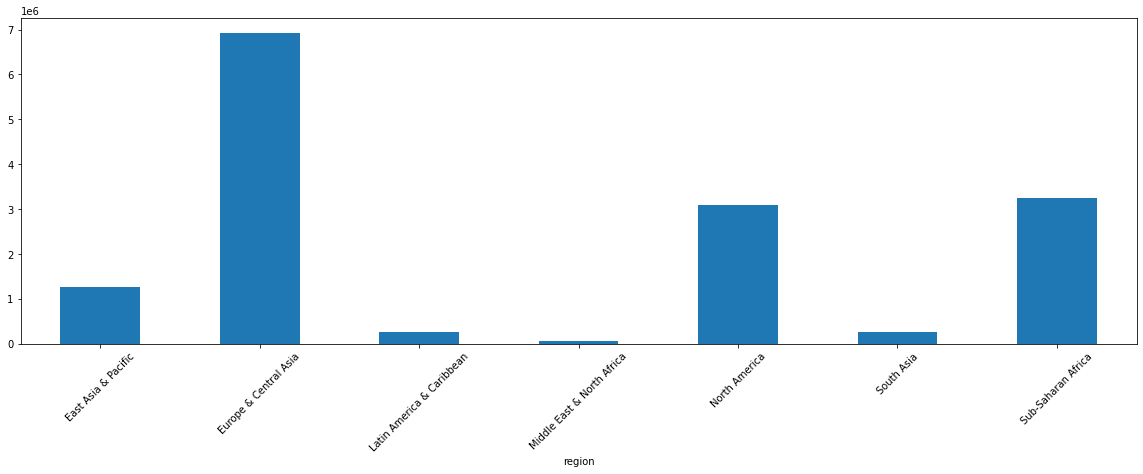

CO2 emissions(region)-1960

region
East Asia & Pacific           1.255713e+06
Europe & Central Asia         6.920887e+06
Latin America & Caribbean     2.526820e+05
Middle East & North Africa    5.257759e+04
North America                 3.083591e+06
South Asia                    2.507020e+05
Sub-Saharan Africa            3.255387e+06
Name: value, dtype: float64


In [38]:
#1960년
plt.figure(figsize = (20,6))
co2_1960_region.plot(kind='bar',rot=0)
plt.xticks(rotation=45)
plt.show()
print("CO2 emissions(region)-1960\n")
print(co2_1960.groupby('region')['value'].sum())

region
East Asia & Pacific            8.331683
Europe & Central Asia         45.920238
Latin America & Caribbean      1.676551
Middle East & North Africa     0.348853
North America                 20.459697
South Asia                     1.663413
Sub-Saharan Africa            21.599565
Name: value, dtype: float64
100.0


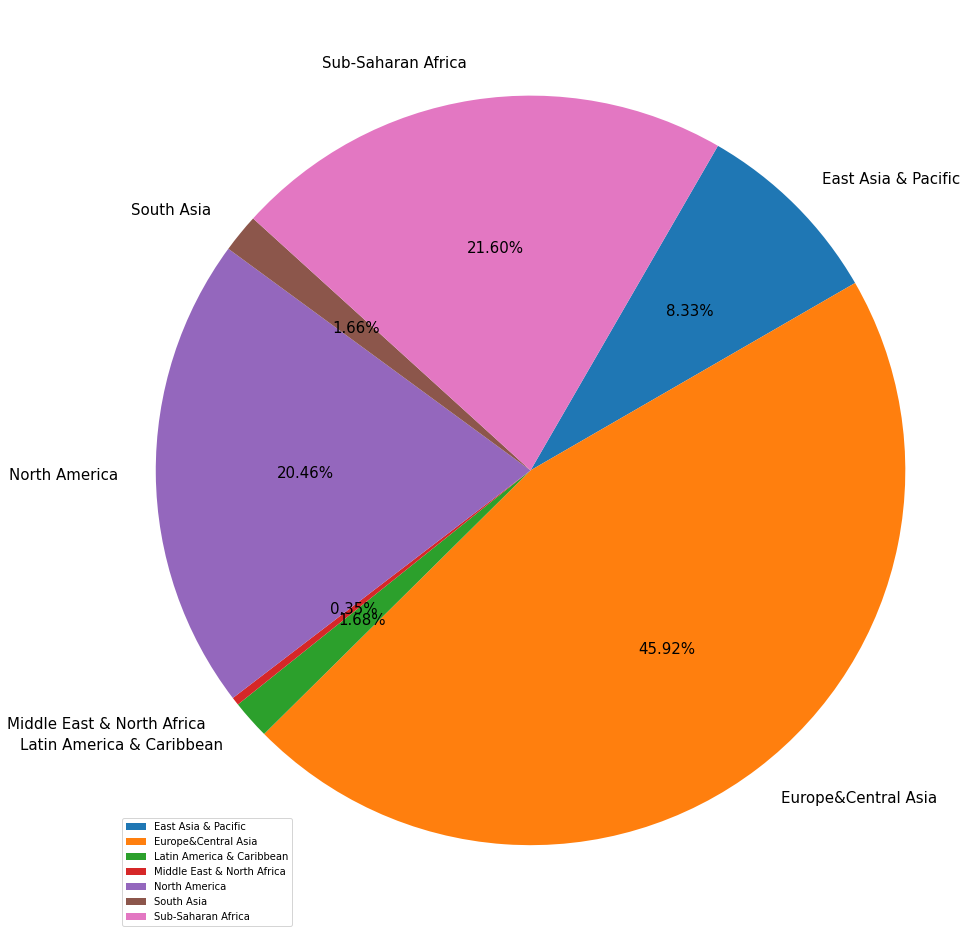

In [39]:
#1960년
total_sum=co2_1960.groupby('region')['value'].sum().sum()
region_sum=co2_1960.groupby("region")["value"].sum()

region_sum/total_sum
ratio=100*(region_sum/total_sum)
print(ratio) 
print(ratio.sum()) #100이라고 출력됨.
labels=['East Asia & Pacific','Europe&Central Asia','Latin America & Caribbean','Middle East & North Africa','North America',
       'South Asia','Sub-Saharan Africa']

plt.figure(figsize=(15,17))
#plt.pie(ratio,labels=labels,shadow=True,startangle=90,autopct='%1.1f%%',textprops={'size':40})
plt.pie(ratio,labels=labels,startangle=60,autopct='%.2f%%',textprops={'size':15},counterclock=False)
 
#plt.figure(figsize=(10,10))
plt.legend(loc='lower left')
plt.axis('equal')
plt.show()

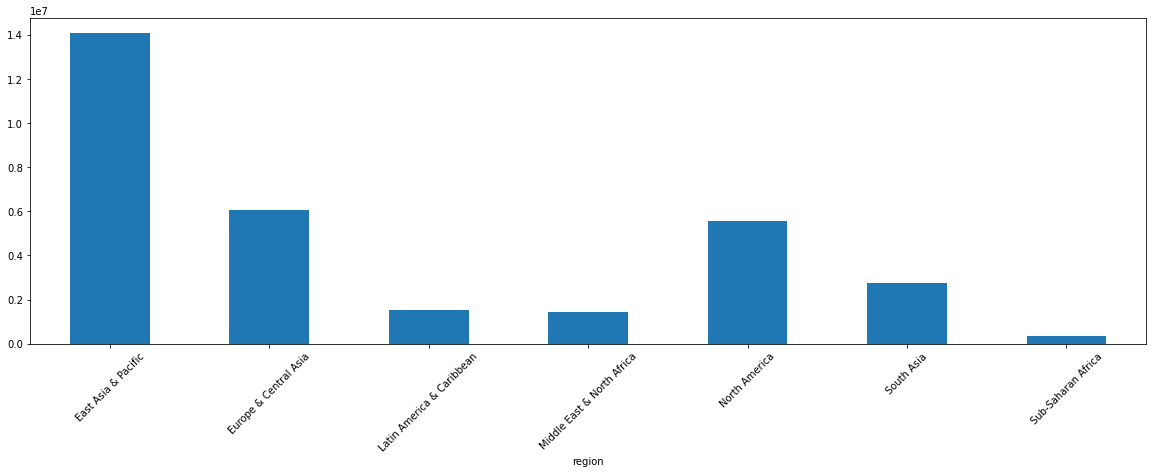

CO2 emissions(region)-2018

region
East Asia & Pacific           14079870.0
Europe & Central Asia          6080860.0
Latin America & Caribbean      1535410.0
Middle East & North Africa     1446910.0
North America                  5555700.0
South Asia                     2770040.0
Sub-Saharan Africa              349340.0
Name: value, dtype: float64


In [40]:
#co2_1960_regionSum=co2_1960.groupby('region')['value'].sum()
#2018년
plt.figure(figsize = (20,6))
co2_2018_region.plot(kind='bar',rot=0)
plt.xticks(rotation=45)
plt.show()
print("CO2 emissions(region)-2018\n")
print(co2_2018.groupby('region')['value'].sum())

region
East Asia & Pacific           44.251092
Europe & Central Asia         19.111305
Latin America & Caribbean      4.825582
Middle East & North Africa     4.547439
North America                 17.460800
South Asia                     8.705854
Sub-Saharan Africa             1.097928
Name: value, dtype: float64
100.0


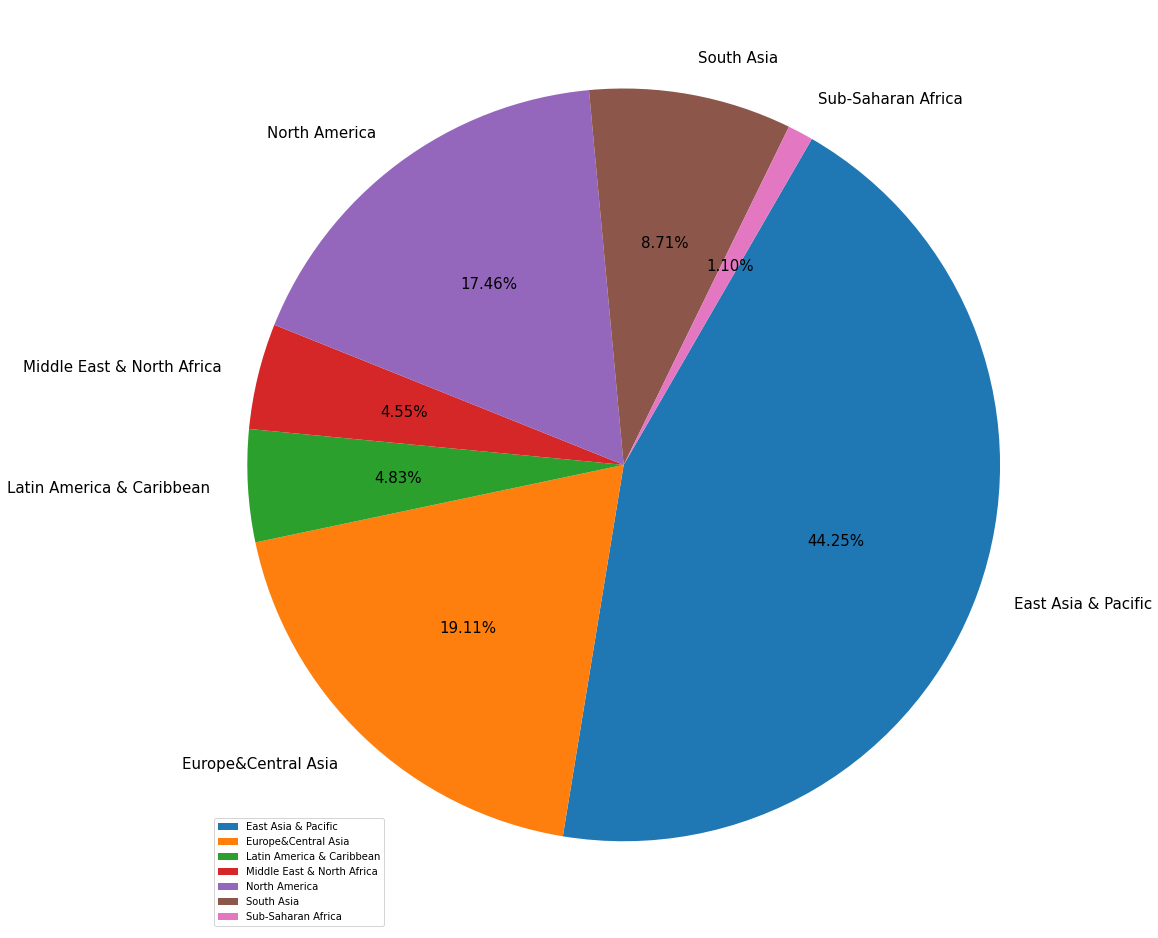

In [41]:
#2018년
total_sum=co2_2018.groupby('region')['value'].sum().sum()
region_sum=co2_2018.groupby("region")["value"].sum()

region_sum/total_sum
ratio=100*(region_sum/total_sum)
print(ratio) 
print(ratio.sum()) #100이라고 출력됨.
labels=['East Asia & Pacific','Europe&Central Asia','Latin America & Caribbean','Middle East & North Africa','North America',
       'South Asia','Sub-Saharan Africa']

plt.figure(figsize=(15,17))
#plt.pie(ratio,labels=labels,shadow=True,startangle=90,autopct='%1.1f%%',textprops={'size':40})
plt.pie(ratio,labels=labels,startangle=60,autopct='%.2f%%',textprops={'size':15},counterclock=False)
 
#plt.figure(figsize=(10,10))
plt.legend(loc='lower left')
plt.axis('equal')
plt.show()

In [42]:
#2018년 상위 5개 국가를 표현
co2_merged_clean2018=co2_merged_clean[co2_merged_clean.year=='2018'].sort_values('value',ascending=False)
co2_merged_clean2018

,country_name,country_code,region,incomegroup,year,value
8786,China,CHN,East Asia & Pacific,Upper middle income,2018,10313460.0
8903,United States,USA,North America,High income,2018,4981300.0
8820,India,IND,South Asia,Lower middle income,2018,2434520.0
8877,Russian Federation,RUS,Europe & Central Asia,Upper middle income,2018,1607550.0
8828,Japan,JPN,East Asia & Pacific,High income,2018,1106150.0
...,...,...,...,...,...,...
8791,Cabo Verde,CPV,Sub-Saharan Africa,Lower middle income,2018,620.0
8766,Burundi,BDI,Sub-Saharan Africa,Low income,2018,590.0
8882,Solomon Islands,SLB,East Asia & Pacific,Lower middle income,2018,370.0
8782,Central African Republic,CAF,Sub-Saharan Africa,Low income,2018,330.0


In [43]:
top5_co2_2018=co2_merged_clean2018.head(5).country_name[:5]
co2_top5_country=[]
for country in top5_co2_2018:
    co2_top5_country.append(country)
co2_top5_country

['China', 'United States', 'India', 'Russian Federation', 'Japan']

In [44]:
df_new_co2=co2_merged_clean[co2_merged_clean['country_name'].isin(co2_top5_country)]
df_new_co2

,country_name,country_code,region,incomegroup,year,value
28,China,CHN,East Asia & Pacific,Upper middle income,1960,7.807263e+05
62,India,IND,South Asia,Lower middle income,1960,1.205820e+05
70,Japan,JPN,East Asia & Pacific,High income,1960,2.327812e+05
119,Russian Federation,RUS,Europe & Central Asia,Upper middle income,1960,1.448637e+06
145,United States,USA,North America,High income,1960,2.890696e+06
...,...,...,...,...,...,...
8786,China,CHN,East Asia & Pacific,Upper middle income,2018,1.031346e+07
8820,India,IND,South Asia,Lower middle income,2018,2.434520e+06
8828,Japan,JPN,East Asia & Pacific,High income,2018,1.106150e+06
8877,Russian Federation,RUS,Europe & Central Asia,Upper middle income,2018,1.607550e+06


In [45]:
#상위 top5
df_new_co2.set_index('year',inplace=True)
df_new_co2

,country_name,country_code,region,incomegroup,value
year,,,,,
1960,China,CHN,East Asia & Pacific,Upper middle income,7.807263e+05
1960,India,IND,South Asia,Lower middle income,1.205820e+05
1960,Japan,JPN,East Asia & Pacific,High income,2.327812e+05
1960,Russian Federation,RUS,Europe & Central Asia,Upper middle income,1.448637e+06
1960,United States,USA,North America,High income,2.890696e+06
...,...,...,...,...,...
2018,China,CHN,East Asia & Pacific,Upper middle income,1.031346e+07
2018,India,IND,South Asia,Lower middle income,2.434520e+06
2018,Japan,JPN,East Asia & Pacific,High income,1.106150e+06


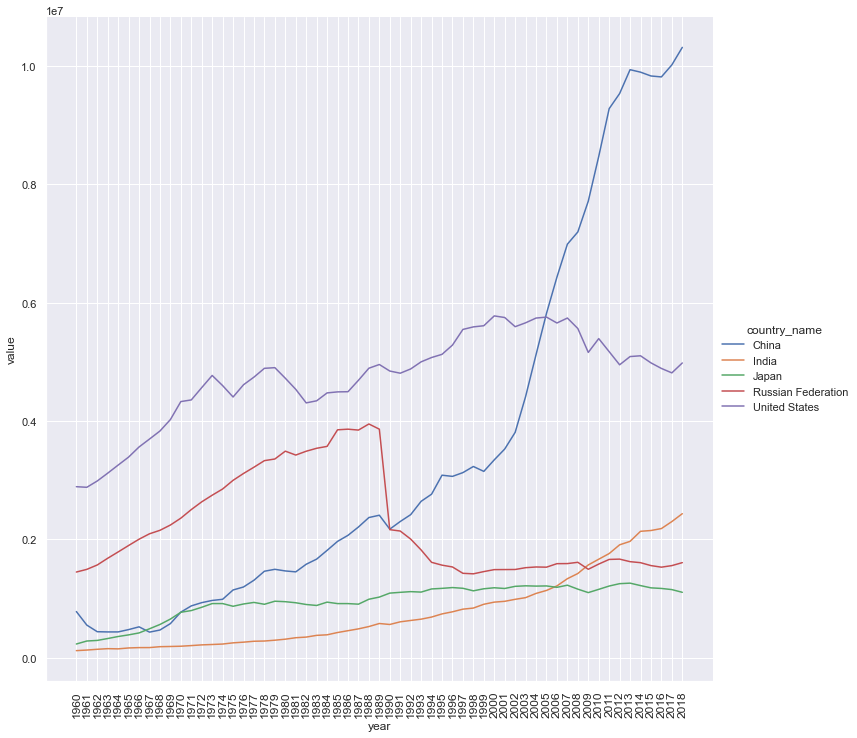

In [46]:
sns.set(rc = {'figure.figsize':(15,15)})
sns.set(font_scale=1)
#sns.set(font_scale=0.5)

g=sns.relplot(x=df_new_co2.index,y=df_new_co2.value,hue=df_new_co2.country_name,height=10,kind='line')
plt.xticks(size=12,rotation=90)
plt.show()

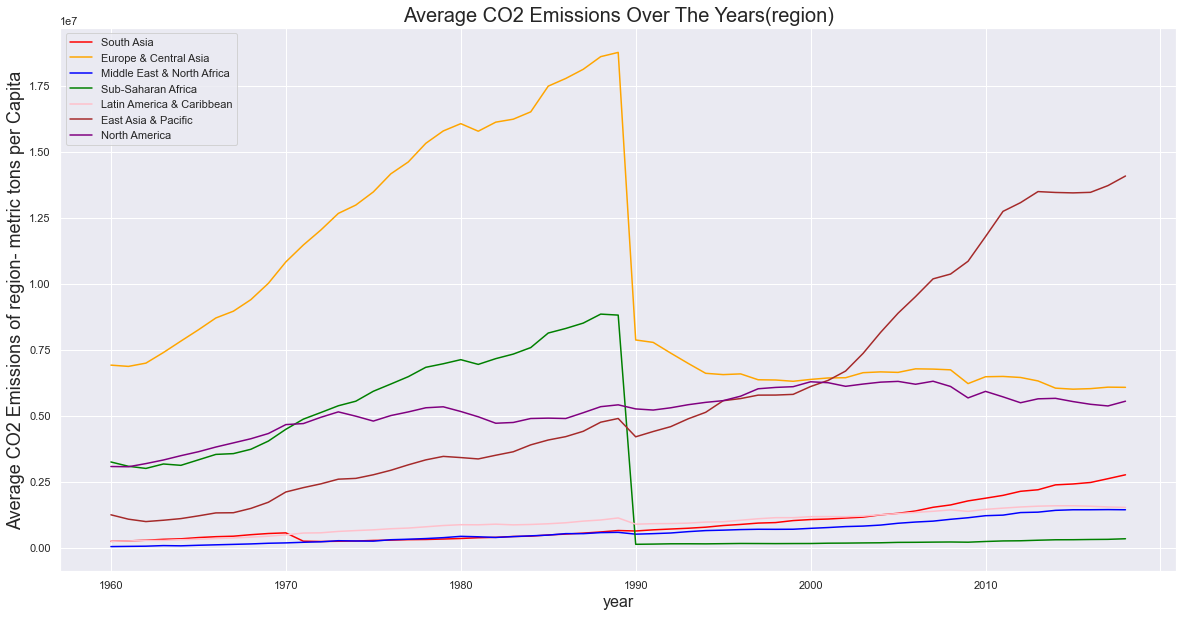

In [47]:
fig, ax = plt.subplots(figsize = (20,10))
#co2_merged_clean.groupby("year")["value"].mean().plot(ax = ax, color = "black", label = "Worldwide")
co2_merged_clean[co2_merged_clean["region"] == "South Asia"].groupby("year")["value"].sum().plot(ax = ax, color = "red", label = "South Asia")
co2_merged_clean[co2_merged_clean["region"] == "Europe & Central Asia"].groupby("year")["value"].sum().plot(ax = ax, color = "orange", label = "Europe & Central Asia")
co2_merged_clean[co2_merged_clean["region"] == "Middle East & North Africa"].groupby("year")["value"].sum().plot(ax = ax, color = "blue", label = "Middle East & North Africa")
co2_merged_clean[co2_merged_clean["region"] == "Sub-Saharan Africa"].groupby("year")["value"].sum().plot(ax = ax, color = "green", label = "Sub-Saharan Africa")
co2_merged_clean[co2_merged_clean["region"] == "Latin America & Caribbean"].groupby("year")["value"].sum().plot(ax = ax, color = "pink", label = "Latin America & Caribbean")
co2_merged_clean[co2_merged_clean["region"] == "East Asia & Pacific"].groupby("year")["value"].sum().plot(ax = ax, color = "brown", label = "East Asia & Pacific")
co2_merged_clean[co2_merged_clean["region"] == "North America"].groupby("year")["value"].sum().plot(ax = ax, color = "purple", label = "North America")

plt.xlabel("year", fontsize = 16)
plt.ylabel("Average CO2 Emissions of region- metric tons per Capita", fontsize = 18) #y축이 의미하는 바 고쳐야함
plt.title("Average CO2 Emissions Over The Years(region)", fontsize = 20) #제목 바꿔야함. 
plt.legend(fontsize = 11,loc='upper left')
plt.show()

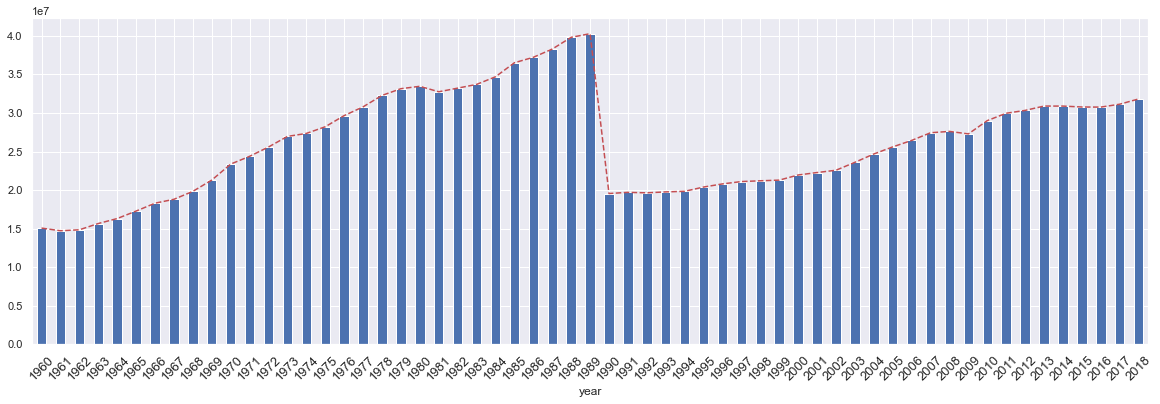

In [48]:
#연도별 co2배출량의 sum으로 고치자. 
plot_co2_year= co2_merged_clean.groupby("year")["value"].sum() 
plt.figure(figsize = (20,6))
plot_co2_year.plot(kind='bar',rot=0)
plot_co2_year.plot(kind='line',color='r',linestyle='--')
plt.xticks(rotation=45,size=13)
plt.show()

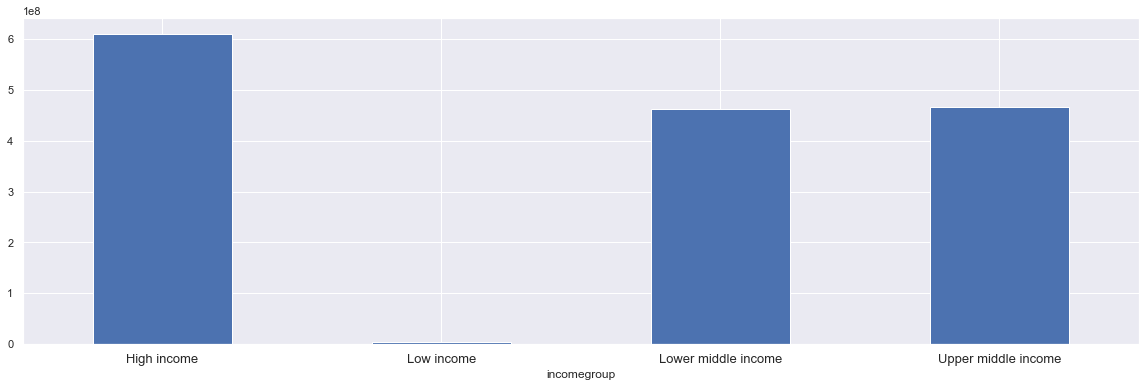

In [49]:
#income group별 co2배출량의 합
plot_co2_income= co2_merged_clean.groupby("incomegroup")["value"].sum()
plt.figure(figsize = (20,6))
plot_co2_income.plot(kind='bar',rot=0)
plt.xticks(size=13)
plt.show()

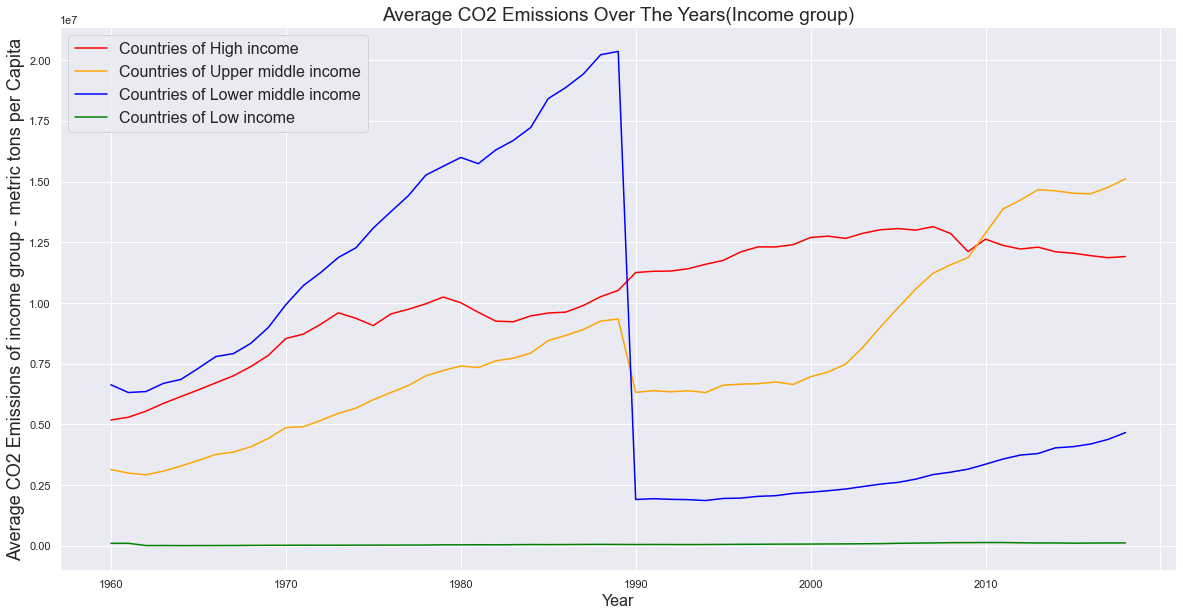

In [50]:
fig, ax = plt.subplots(figsize = (20,10))
#co2_merged_clean.groupby("year")["value"].mean().plot(ax = ax, color = "black", label = "Worldwide")
co2_merged_clean[co2_merged_clean["incomegroup"] == "High income"].groupby("year")["value"].sum().plot(ax = ax, color = "red", label = "Countries of High income")
co2_merged_clean[co2_merged_clean["incomegroup"] == "Upper middle income"].groupby("year")["value"].sum().plot(ax = ax, color = "orange", label = "Countries of Upper middle income")
co2_merged_clean[co2_merged_clean["incomegroup"] == "Lower middle income"].groupby("year")["value"].sum().plot(ax = ax, color = "blue", label = "Countries of Lower middle income")
co2_merged_clean[co2_merged_clean["incomegroup"] == "Low income"].groupby("year")["value"].sum().plot(ax = ax, color = "green", label = "Countries of Low income")
plt.xlabel("Year", fontsize = 16)
plt.ylabel("Average CO2 Emissions of income group - metric tons per Capita", fontsize = 18)
plt.title("Average CO2 Emissions Over The Years(Income group)", fontsize = 19) 
plt.legend(fontsize = 16,loc='upper left')
plt.show()

In [51]:
ch4_meta_data=pd.read_csv('Metadata_Country_API_EN.ATM.METH.KT.CE_DS2_en_csv_v2_3161021-methane emissions.csv')
ch4_meta_data.head(5)

,Country Code,Region,IncomeGroup,SpecialNotes,TableName,Unnamed: 5
0,ABW,Latin America & Caribbean,High income,NaN,Aruba,NaN
1,AFE,NaN,NaN,"26 countries, stretching from the Red Sea in t...",Africa Eastern and Southern,NaN
2,AFG,South Asia,Low income,Fiscal year end: March 20; reporting period fo...,Afghanistan,NaN
3,AFW,NaN,NaN,"22 countries, stretching from the westernmost ...",Africa Western and Central,NaN
4,AGO,Sub-Saharan Africa,Lower middle income,NaN,Angola,NaN


In [52]:
ch4_meta_data.shape

(265, 6)

In [53]:
ch4_value_data=pd.read_csv('API_EN.ATM.METH.KT.CE_DS2_en_csv_v2_3161021-methane emissions.csv')
ch4_value_data.head(5)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,Methane emissions (kt of CO2 equivalent),EN.ATM.METH.KT.CE,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,Methane emissions (kt of CO2 equivalent),EN.ATM.METH.KT.CE,NaN,NaN,NaN,NaN,NaN,NaN,...,523850.0,534240.0,538060.0,543720.0,554570.0,563050.0,564380.0,570040.0,NaN,NaN
2,Afghanistan,AFG,Methane emissions (kt of CO2 equivalent),EN.ATM.METH.KT.CE,NaN,NaN,NaN,NaN,NaN,NaN,...,39480.0,48780.0,58130.0,67770.0,76590.0,78150.0,79610.0,81510.0,NaN,NaN
3,Africa Western and Central,AFW,Methane emissions (kt of CO2 equivalent),EN.ATM.METH.KT.CE,NaN,NaN,NaN,NaN,NaN,NaN,...,327790.0,336470.0,348150.0,356630.0,368640.0,383250.0,386400.0,392130.0,NaN,NaN
4,Angola,AGO,Methane emissions (kt of CO2 equivalent),EN.ATM.METH.KT.CE,NaN,NaN,NaN,NaN,NaN,NaN,...,38100.0,37110.0,37420.0,36700.0,37180.0,37400.0,37450.0,35520.0,NaN,NaN
